### [MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv](https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data)
Columns: 
- __month__: The month in which subway trains delayed is being calculated (yyyy-mm-dd).
- __division__: The A Division (numbered subway lines), B Division (lettered subway lines) and systemwide.
- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, J, Z, L, N, Q, R, W, S 42nd, S Rock, S Fkln).
- __day_type__: Represents weekday as 1 and weekend as 2.
- __reporting_category__: The six categories that delays are reported under: Infrastructure & equipment, Crew availability, Police & medical, External Factors, Operating conditions, Planned ROW work. 
- __subcategory__: The sub-categories that fall under the definition of Delays: Braking; Door-Related; Fire, Smoke, Debris; Inclement Weather; Crew Availability; Insufficient Supplement Schedule; Propulsion; Public Conduct, Crime, Police Response; Rail and Roadbed; Persons on Roadbed; Service Delivery; Sick/Injured Customer; Train Brake Activation - Cause Unknown; Subways Maintenance; Work Equipment; Capital Work - Other Planned ROW; External Debris on Roadbed; External Agency or Utility; Capital Work - Other Planned ROW; Other – CE; Other – Sig; Other Infrastructure; Other Internal Disruptions.
- __delays__: The number of train delays per category and time period.

# Data Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delays_file = "MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv"
df = pd.read_csv(delays_file)

line_colors = {
    "1": "red",
    "2": "red",
    "3": "red",
    "4": "green",
    "5": "green",
    "6": "green",
    "7": "purple",
    "A": "blue",
    "C": "blue",
    "E": "blue",
    "B": "orange",
    "D": "orange",
    "F": "orange",
    "G": "lightgreen",
    "GS": "lightgreen",
    "M": "orange",
    "J": "brown",
    "Z": "brown",
    "JZ": "brown",
    "L": "gray",
    "N": "gold",
    "Q": "gold",
    "R": "gold",
    "W": "gold",
    "S Fkln": "lightgray",
    "S Rock": "lightgray",
}

Text(0.5, 0, 'Subway Line')

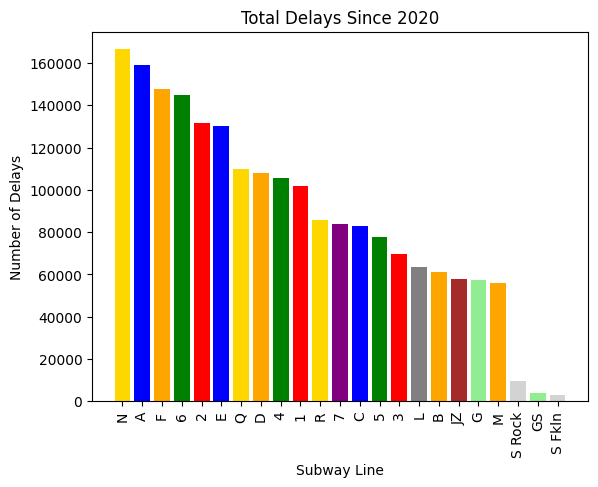

In [6]:
# Group by line and aggregate delays count
line_grouped = df.groupby(['line'], as_index=False).agg({'delays': 'sum'}).rename({"S Fkln": "SF", "S Rock": "SR"})
# sort by delays
line_grouped = line_grouped.sort_values('delays', ascending=False)

# Plot the result on a bar graph
ax = plt.bar(line_grouped['line'], line_grouped['delays'], color=[line_colors[line] for line in line_grouped['line']])
plt.xticks(rotation='vertical')
plt.title("Total Delays Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Subway Line")

In [7]:
# Group by delay type and aggregate delays count
type_grouped = df.groupby(['reporting_category', 'subcategory'], as_index=False).agg({'delays': 'sum'})
